#  Exercise 1 Marsaglia-Bray algorithm

In [22]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

Let R a random variable with Rayleigh distribution with parameter 1 and $\Theta$ with uniform
distribution on $[0, 2\pi]$. We also assume that R and $\Theta$ are independent.

$$ \forall r \in \mathbb{R} \ \ \ f_R(r)=rexp(-\frac{r^2}{2}) \mathbb{1}_{\mathbb{R}^+}(r)$$

## Q1
Let X and Y such that

\begin{equation}
X = R cos(\theta) \ \ \ \text{and} \ \ \ Y = R sin(\theta) \ \ \ \text{(1)}
\end{equation}

Prove that both X and Y have N (0, 1) distribution and are independent.

$$E[h(x,y)]=E[h(R,\theta)]=\int_{[0,2\pi]x\mathbb{R}^+} h(R,\theta) \frac{1}{2\pi} rexp(-\frac{r^2}{2}) dr d\theta$$

We have that the Jacobian of the transformation (1) equals $R$, then:

$$\int_{[0,2\pi]x\mathbb{R}^+} h(R,\theta) \frac{1}{2\pi} rexp(-\frac{r^2}{2}) dr d\theta = \int_{\mathbb{R}x\mathbb{R}} h(x,y) \frac{1}{2\pi} exp(-\frac{(x+y)^2}{2}) dr d\theta $$

This shows tha X and Y are independent and follow a N(0,1) distribution.

## Q2

Write an algorithm for sampling independent Gaussian distribution N(0, 1).

In [26]:
def r_Gaussian(size=100):
    u1=np.random.uniform(0,1,size=size)
    u2=np.random.uniform(0,2*np.pi,size=size)
    #### I use the inverse method to sample from R
    R=np.sqrt(-2*np.log(1-u1))
    x=R*np.cos(u2)
    y=R*np.sin(u2)
    return x,y

Text(0.5, 1.0, 'Y axis')

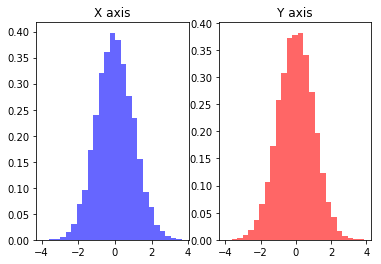

In [27]:
x,y=r_Gaussian(10000)
#plt.subplot(121)
ax1 = plt.subplot(121)
ax1.hist(x,bins=25,density=True,alpha=0.6,color='b')
ax1.set_title('X axis')
ax2 = plt.subplot(122)
ax2.hist(y,bins=25,density=True,alpha=0.6,color='r')
ax2.set_title('Y axis')

# Q3

In [20]:
def r_MBnorm(n):
    k=0
    gaus=np.zeros(n)
    while k<n:
        w=np.random.uniform(0,1,2)
        w=2*w-1
        if w.dot(w)<=1:
            s=np.sqrt(-2*np.log(w.dot(w)))
            x=(s*w)/np.sqrt(w.dot(w))
            gaus[np.min([k,n-1])]=x[0]
            gaus[np.min([k+1,n-1])]=x[1]
            k=k+2
    return(gaus)     

In [8]:
x=r_MBnorm(10000)

(array([3.27369836e-04, 1.30947935e-03, 3.60106820e-03, 8.51161575e-03,
        1.34221633e-02, 3.83022709e-02, 5.20518040e-02, 1.00829910e-01,
        1.64339658e-01, 2.34396803e-01, 3.00852880e-01, 3.69927915e-01,
        3.93498543e-01, 3.96772242e-01, 3.63707888e-01, 2.73353813e-01,
        2.13117763e-01, 1.51572234e-01, 9.03540748e-02, 5.43433928e-02,
        2.94632853e-02, 1.17853141e-02, 3.92843804e-03, 2.29158885e-03,
        1.63684918e-03]),
 array([-3.9296855 , -3.62422058, -3.31875566, -3.01329075, -2.70782583,
        -2.40236091, -2.09689599, -1.79143108, -1.48596616, -1.18050124,
        -0.87503632, -0.56957141, -0.26410649,  0.04135843,  0.34682335,
         0.65228826,  0.95775318,  1.2632181 ,  1.56868301,  1.87414793,
         2.17961285,  2.48507777,  2.79054268,  3.0960076 ,  3.40147252,
         3.70693744]),
 <a list of 25 Patch objects>)

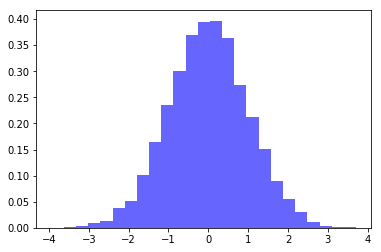

In [9]:
plt.hist(x,bins=25,density=True,alpha=0.6,color='b')

a) What is the distribution of $W=(w_1, w_2)$ at the end of the repeat/until loop ?

It is a uniform distribution over the circunference of radius 1 and centered at 0.

b) Set 
$$T = \frac{w_1}{w_1^2+w_2^2} \ \ \ R=w_1^2+w_2^2$$

Show that T and R are independent, $R\sim U([0, 1])$ and T has the same distribution
as $cos(\theta)$ with $\theta \sim U([0, 2\pi])$.

\begin{aligned}
E[h(T,R)]=E[h(w_1,w_2)] & = \int_{B(0,1)} h(\frac{w_1}{w_1^2+w_2^2},w_1^2+w_2^2)\frac{1}{2\pi} dW \\
& = \int_{[0,2\pi]x[0,1]} h(cos(\theta),r^2) \frac{r}{\pi} d\theta dr \\
& = \int_{[0,2\pi]x[0,1]} h(cos(\theta),R) \frac{1}{2 \pi} d\theta dR
\end{aligned}

Then we have that T and R are independent and follow the distribution stated in the question. 

c) What is the distribution of the output $X=(x_1,x_2)$?

It is clear that the distribution of $w_1^2+w^2$ follows a uniform distribution in $[0,1]$.

Now, I will find the distribution of $s=\sqrt{-2 ln(w_1^2+w_2^2)}$.

\begin{aligned}
F(r)=P(s<r) & = P(\sqrt{-2 ln(w_1^2+w_2^2)} <r) \\
& = P(-2 ln(w_1^2+w_2^2) <r^2) \\
& = P(w_1^2+w_2^2 > \exp{\frac{-r^2}{2}}) \\
& = 1-\exp{\frac{-r^2}{2}}
\end{aligned}

Then $f_s(r)= r \exp{\frac{-r^2}{2}}$, this means it follows the same distribution that R of question 1.

As $x_1$ and $x_2$ are generated under the same hypothesis of question 1. We have that $X~N(0,I)$


d) What is the acceptance probability of the repeat/until test ?

It can be seen that before the rejection step w follows a uniform distribution in the square $[-1,1]x[-1,1]$. Then the rejection probability is the area of the circle divided by the rectangle's area: $\frac{\pi}{4}$.

# Excercise 2: Invariant distribution

We define a Markov chain $(Xn)_{n \leq 0}$ with values in $[0, 1]$ as follows : given the current value
$X_n (n \in N)$ of the chain,

if $X_n =\frac{1}{m}$ (for some positive integer m), we let :

\begin{equation}
\begin{cases}
  X_{n+1}=\frac{1}{m+1} \ \ \ \text{with probability} \ \ \ 1-X_n^2 \\
  X_{n+1} \sim u(0,1) \ \ \ \text{with probability} \ \ \ X_n^2
\end{cases}
\end{equation}

If not, $X_{n+1} \sim U(0,1)$ 

## Q1

Prove that the transition kernel of the chain $(X_n)_{n\geq0}$ is given by :

\begin{equation}
P(x,a)=
\begin{cases}
x^2 \int_{A \cap [0,1]}dt +(1-x^2) \delta_{\frac{1}{m+1}}(A) \ \ \ if \ \ x=\frac{1}{m} \\
\int_{A \cap [0,1]}dt \ \ \ \text{otherwise}
\end{cases}
\end{equation}

where $\delta_{\alpha}$ is the Dirac measure at $\alpha$.

$E[f(x_{n+1})|F_n]=E[f(x_{n+1})|x_n]$

$$E[f(x_{n+1})|x_n=\frac{1}{m}]=(1-x_n^2)f(\frac{1}{m+1})+x_n^2\int_{0}^{1} f(x) dx$$ 

$$E[f(x_{n+1})|x_n \neq \frac{1}{m}]=\int_{0}^{1} f(x) dx$$

By sustituing f(x) by $\textbf{1}(A)$, we get the result.

## Q2

Prove that the uniform distribution on $[0, 1]$ is invariant for P. In the following, this
invariant distribution will be denoted by $\pi$.

\begin{aligned}
P\pi(x) & = \int_{[0,1]xB} \pi(x) P(x,y) dx dy \\
& = \int_{0}^{1} \int_{B \cap [0,1]} dx dy \\
& = \int_{B \cap [0,1]} dy \\
& = \pi(B)
\end{aligned}

## Q3

Let $x \notin {\frac{1}{m}, m \in N^*}$.Compute $Pf(x)$ for a bounded measurable function $f$. Deduce
$P^n f(x)$ for all $n \geq 1$. Compute $lim_{n->+\infty} P^n f(x)$ in terms of $\int f(x) \pi(x)dx$.


Let's prove the result by recursion.

For n=1, we have 

\begin{aligned}
P(f(x)) & = \int_{\mathbb{R}} P(x,dy) f(y)  \\
& = \int_{0}^{1} f(y) dy \\
& = \int_{\mathbb{R}} f(y) \pi(y) dy 
\end{aligned}

We suppose that for $n \in \mathbb{N}$ , we have:

$$P^n(f(x))=\int_{\mathbb{R}} f(y) \pi(y) dy$$

Then:

\begin{aligned}
P^{n+1}(f(x)) & =  P(P^{n}(f(x))) \\
& = \int_{\mathbb{R}} P(x,dy) P^{n}(f(y)) \\
& = \int_{0}^{1} P^{n}(f(y)) dy \\ 
& = \int_{0}^{1} \int_{\mathbb{R}} f(x) \pi(x) dx  dy \\
& =\int_{\mathbb{R}} f(x) \pi(x) dx
\end{aligned}

This means that:

$lim_{n->+\infty} P^n f(x)=\int f(x) \pi(x)dx$

## Q4

Let $x=\frac{1}{m}$ with $m \geq 2$

a) Let $n \in N^*$. Compute $P^n(x,\frac{1}{n+m})$ in terms of m and n.

For $n=1$ we have:

$P(x,\frac{1}{m+1})=(1-(\frac{1}{m})^2)$

Now, let's suppose $P^k(x,\frac{1}{k+m})=\prod_{i=0}^{k-1} (1-(\frac{1}{m+i})^2)  \mathbb{1}_x(\frac{1}{m})$ for a given $k>1$.
Then:

\begin{aligned}
P^{k+1}(x,\frac{1}{k+m+1}) & = \int P^{k}(x,dy)P(y,\frac{1}{k+m+1}) \\
& = \prod_{i=0}^{k-1} (1-(\frac{1}{m+i})^2) P(\frac{1}{m+k},\frac{1}{k+m+1}) \\
& = \prod_{i=0}^{k} (1-(\frac{1}{m+i})^2)
\end{aligned}


b) Do we have $lim_{n->+ \infty} P^n(x,A)=\pi(A)$ when $A=\bigcup\limits_{q \in N} {\frac{1}{m+1+q}}$ ?


No, $\pi(A)=0$, while the limit is bigger than zero:

\begin{aligned}
P^n(\frac{1}{m},A) & = \sum_{q \in N} P^n(\frac{1}{m},\frac{1}{m+1+q})\\
& = P^n(\frac{1}{m},\frac{1}{m+n}) \\
& = \prod_{i=1}^{n-1} (1-(\frac{1}{m+i})^2) \\
& = \prod_{i=m}^{m+n-1} (1-(\frac{1}{i})^2) \\
& \geq \prod_{i=2}^{m+n-1} (1-(\frac{1}{i})^2) \\
& = \prod_{i=2}^{m+n-1} (\frac{(i-1)(i+1)}{i^2}) \\
& = \frac{1*3}{2*2} \frac{2*3}{3*3} ... \frac{(m+n)*(m+n-2)}{(m+n-1)*(m+n-1)} \\
& = (\frac{1}{2}+\frac{1}{m+n-1})
\end{aligned}

Then:

$$lim_{n->\infty} P^n(\frac{1}{m},A) \geq \frac{1}{2} >0$$


#  Excercise 3 Stochastic Gradient Descent

In the exercise, we consider the problem of classifying patterns x into two classes $y = ±1$. We assume that there is a relationship between a pattern and its class, embodied by some probability distribution $P(x, y)$. If we know this distribution, we know the conditional probabilities $P(y|x)$ as well, and we can solve immediately the problem using the Bayes decision rule. Learning means “Acquiring enough knowledge about $P(x, y)$ from the examples to solve
the classification problem”.

The statistical machine learning approach begins with the collection of a sizeable set of examples $\{(x_1, y_1), . . . , (x_n, _yn)\}$, where for each $i \in [1,n]$ the vector $x_i$ represents the features and the scalar $y_i$ a label indicating whether $x_i$ belongs $(y_i = 1)$ or not $(y_i = −1)$ to a particular class. With such a set of examples, one can construct a classification program, defined by a prediction function h, and measure its performance by counting how often the program
prediction $h(x_i)$ differs from the correct prediction $y_i$. To avoid rote memorization, one should aim to find a prediction function that generalizes the concepts that may be learned from the examples. One way to achieve good generalized performance is to choose amongst a carefully selected class of prediction functions.

Thanks to such a high-dimensional sparse representation of documents, it has been deemed empirically sufficient to consider prediction functions of the form $h(x;w,\tau) = w^tx − \tau$ . Here, $w^tx$ is a linear discriminant parameterized by $w \in \mathbb{R}^d$ and $\tau \in \mathbb{R}$ is a bias that provides a way to compromise between precision and recall, $P[y = 1|h(x) = 1]$ and $P[h(x) = 1|y = 1]$ respectively. The accuracy of the predictions could be determined by counting the number of times that $sign(h(x;w, \tau ))$ matches the correct label, i.e., 1 or -1. However, while such a prediction function may be appropriate for classifying new features, formulating an optimization problem around it to choose the parameters $(w; \tau)$ is impractical in large-scale settings due to the combinatorial structure introduced by the sign function, which is discontinuous. Instead, one typically employs a continuous approximation through a loss function that measures a cost for predicting h when the true label is y.

An Adaline (Widrow and Hoff, 1960) actually learns by (i) considering linear prediction
function, $h(x,w) = w^tx$, and (ii) measuring the quality of the system through the mean squared
error :
$$CAdaline(w) =\int (y − h(x,w))^2 dP(x, y) =\int (y − w^tx)^2 dP(x, y)$$

Learning consists of finding the parameter w that minimizes the above, or a more general, cost. This framework is the basis of classical statistical inference theory. Hundreds of practical algorithms have been derived.

In the following, we will denote by $z = (x, y)$ the observation and consider the cost or expected risk given a parameter vector w with respect to the probability P. $$R(w) = E[J(w, z)] =\int (y − w^tx)^2 dP(z)$$
While it may be desirable to minimize the expected loss that would be incurred from any inputoutput pair, such a goal is untenable when one does not have complete information about P. Thus, in practice, one seeks the solution of a problem that involves an estimate of the expected risk $\mathbb{R}$. In supervised learning, one has access (either all-at-once or incrementally) to a set of $n \in N$ independently drawn input-output samples $\{z_i = (x_i, y_i)\}_{i=1}^n$ and one may define the
empirical risk function $R_n : \mathbb{R}^d -> \mathbb{R}$ by:

$$R_n(w) = \frac{1}{n} \sum_{i=1}^n (y_i − w^tx_i)^2$$



## Q1 

Describe the stochastic gradient descent algorithm for minimizing the empirical risk and
implement it in matlab or python.

Stochastic gradient descent deals with the problem of minimizing a function  of the form:
    $$min_{w} j(w) = min_{w} E_z[J(w,z)]$$
If we take z to be a discrete uniform distribution, then:
    $$R_n(w)=E_z[(y-w^tx)^2]$$
The implementation of the algorithm would be:

In [2]:
def Exo3_GS(y,x,w0,alpha,niter):
    w_old=w0
    k=1.
    while k<niter:
        i=np.random.randint(1,len(y))
        w_new=w_old+((1./k)**alpha)*2*(y[i-1]-x[i-1,].dot(w_old))*x[i-1,]
        k=k+1
        w_old=w_new
    return(w_new)

## Q2

Sample a set of observations $\{z_i\}_{i=1}^n$ by generating a collection
of random points $x_i$ of $\mathbb{R}^2$, $w \in \mathbb{R}^2$ seen as the normal vector
of an hyperplane, a straight line here, and assigning the label $y_i$
according to the side of the hyperplane the point $x_i$ is.

In [9]:
n=1000
x=np.array(np.random.uniform(0,1,2*n))
x.shape=(n,2)
w=np.array([-1.0,1.0])
w=w/np.sqrt(w.dot(w))
y=x.dot(w)
y[y>0.]=1.
y[y<0.]=-1.

## Q3

Test the algorithm you wrote at the first question over these observations.
What is the vector $w^*$ estimated ? Is it far from  w ?

In [17]:
# Estimation
w0=np.array([1,1])
w0=w0/np.sqrt(w0.dot(w0))
w_est=Exo3_GS(y,x,w0,alpha=0.6,niter=1000)
w_est=w_est/np.sqrt(w_est.dot(w_est))
w_est

array([-0.71068882,  0.70350651])

In [18]:
### Error made
np.linalg.norm(w-w_est)

0.005078675419428579

Text(0.5, 1.0, 'Predicted label')

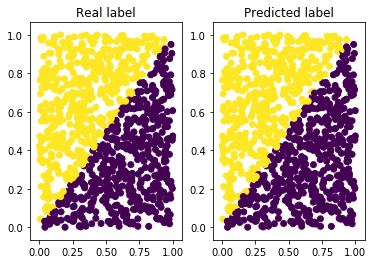

In [20]:
w_est=w_est/np.sqrt(w_est.dot(w_est))
y_est=x.dot(w_est)
y_est[y_est>0.]=1.
y_est[y_est<0.]=-1.
ax1 = plt.subplot(121)
ax1.scatter(x[:,0],x[:,1], c=(y+1))
ax1.set_title('Real label')
ax2 = plt.subplot(122)
ax2.scatter(x[:,0],x[:,1], c=(y_est+1))
ax2.set_title('Predicted label')

The point w_est represents the normal vector of the line which separates both classes. As it can been seen , the point is not far away from the real normal vector, the norm of the difference of both vectors is smaller than 0.05

## Q4

Noise your observations $\{z_i\}_{i=1}^n$ with an additive Gaussian noise and perform the optimisation
again. Compare with the result of question three.

In [12]:
eps=np.array(np.random.normal(0,0.5,2*n))
eps.shape=(n,2)
x_noisy=x+eps


In [13]:
# Estimation 
w0=np.array([-5.0,7.0])
w0=w0/np.sqrt(w0.dot(w0))
w_est=Exo3_GS(y,x_noisy,w0,alpha=0.6,niter=500)
w_est=w_est/np.sqrt(w_est.dot(w_est))

In [14]:
### Error made
np.linalg.norm(w-w_est)

0.158445647138998

Text(0.5, 1.0, 'Predicted label')

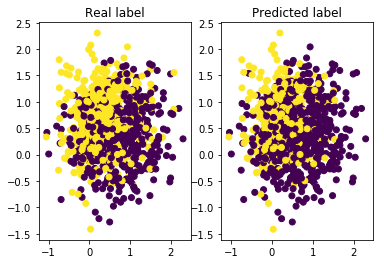

In [16]:
w_est=w_est/np.sqrt(w_est.dot(w_est))
y_est=x.dot(w_est)
y_est[y_est>0.]=1.
y_est[y_est<0.]=-1.
ax1 = plt.subplot(121)
ax1.scatter(x_noisy[:,0],x_noisy[:,1], c=(y+1))
ax1.set_title('Real label')
ax2 = plt.subplot(122)
ax2.scatter(x_noisy[:,0],x_noisy[:,1], c=(y_est+1))
ax2.set_title('Predicted label')

When we add noise to the observations, our estimate of w is worse compare to the results from the real data.

## Q5

Test the algorithm on the Breast Cancer Wisconsin (Diagnostic) Data Set:
http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 .

In [23]:
### Data cleaning
data=pd.read_csv('Breast_Cancer.txt',na_values='?')
data.columns=["id"]+list(["x%d" %i for i in range(1,10)])+list("y")
data.index=data.iloc[:,0]
data=data.iloc[:,1:]
data.dropna(inplace=True)
x_cancer=data[["x%d" %i for i in range(1,10)]]
y_cancer=np.where(data["y"]==2,-1,1)
import sklearn 
from sklearn.preprocessing import Normalizer 
from sklearn.model_selection import train_test_split
x_cancer_train, x_cancer_test, y_cancer_train, y_cancer_test = train_test_split(x_cancer,y_cancer,random_state=0)
scaler = Normalizer().fit(x_cancer_train)
normalized_x_train= scaler.transform(x_cancer_train)
normalized_x_test = scaler.transform(x_cancer_test)

In [24]:
### Estimation 
w0=np.ones(len(x_cancer_train.columns))
w0=w0/(np.sqrt(w0.dot(w0)))
w_est=Exo3_GS(y_cancer_train,normalized_x_train,w0,alpha=0.6,niter=1000)
w_est=w_est/(np.sqrt(w_est.dot(w_est)))

In [26]:
### Confusion matrix
y_pred=np.where(normalized_x_test.dot(w_est)>0,1,-1)
sklearn.metrics.confusion_matrix(y_cancer_test, y_pred)/len(y_pred)

array([[0.60818713, 0.04678363],
       [0.07602339, 0.26900585]])

The algorithm performs well in this data set, with a missclasification of around 12%.